# Exploratory data analysis with Pandas & Matplotlib

## Topics

- Read data from excel
- Data Viz: scatter plot, line chart
- Statistics: Distribution summaries
- Pandas: groupby and MultiIndex


### Dataset
- Dataset Used: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#
- Download file: https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx


In [1]:
import os
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# !pip install openpyxl

In [2]:
# Download the file and put it in the data folder
df = pd.read_excel("data/online_retail_II.xlsx")

# or just read the file directly. 
# df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 131.6 MB


# Columns Description

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

In [6]:
df.columns.str.replace(" ", "_").str.lower()

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='object')

In [7]:
# change columns to lowercase and remove whitespace in between 
# this is useful for using the df.column_name syntax later on
df.columns = ['invoice_id', 'item_id', 'description', 'quantity', 'date',
              'price', 'customer_id', 'country']

In [8]:
df.head()

,invoice_id,item_id,description,quantity,date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1. Simple Statistics

The idea of this is to understand better the dataset

In [13]:
# Number of invoice_ids
df.invoice_id.unique().shape

(28816,)

In [14]:
# Number of item_ids
df.item_id.unique().shape

(4632,)

In [15]:
# Number of description
df.description.unique().shape

(4682,)

In [16]:
# Number of customers
df.customer_id.unique().shape

(4384,)

In [17]:
# Start/End of date
df.date.min(), df.date.max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

In [18]:
# number of countries
df.country.unique().shape

(40,)

## 2. Initial data analysis

In [19]:
# let's create the sales column
df['sales'] = df['quantity'] * df['price']

In [20]:
df.head()

,invoice_id,item_id,description,quantity,date,price,customer_id,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [21]:
# global distribution of the time series
# negative values are probably refunds
df.sales.quantile([0, 0.25, 0.5, 0.75, 1])

0.00   -53594.36
0.25        3.75
0.50        9.95
0.75       17.70
1.00    25111.09
Name: sales, dtype: float64

In [25]:
#df.boxplot('sales')

In [26]:
# invoice_id starts with C when we have a refund.
# Also the quantity is negative
df.query("sales < 0").head()

,invoice_id,item_id,description,quantity,date,price,customer_id,country,sales
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4


## 2.1. Demand curve 

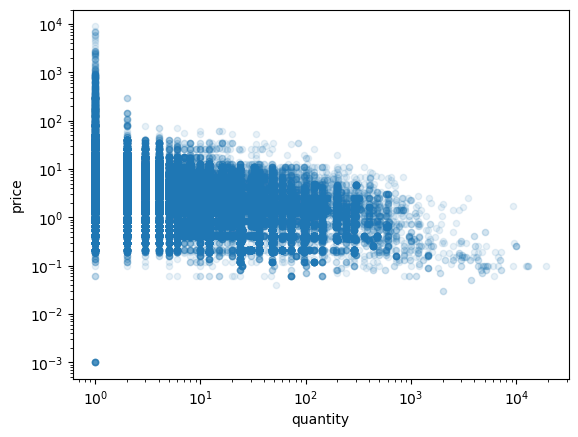

In [29]:
(
    df.query("price < 10000 & price > 0 & quantity > 0")
    .plot(x='quantity', y='price', 
          kind='scatter', 
          loglog=True, 
          alpha=0.1)
);

In [30]:
# how to read the axis labels
10**0.5, 10**1, 10**2, 10**3, 10**4

(3.1622776601683795, 10, 100, 1000, 10000)

## 2.2. Sales at the daily level

In [33]:
# compact method 
agg_daily_sales = df.groupby("date")['sales'].sum()

In [32]:
# one operation by line
agg_daily_sales = (
    df.groupby("date")   # groupby 
    ['sales']            # select a column
    .sum()               # function to apply
)
agg_daily_sales

date
2009-12-01 07:45:00     505.30
2009-12-01 07:46:00     145.80
2009-12-01 09:06:00     630.33
2009-12-01 09:08:00     310.75
2009-12-01 09:24:00    2286.24
                        ...   
2010-12-09 18:58:00     298.95
2010-12-09 19:23:00     318.70
2010-12-09 19:28:00      93.45
2010-12-09 19:32:00     317.59
2010-12-09 20:01:00     300.64
Name: sales, Length: 25296, dtype: float64

In [34]:
type(agg_daily_sales)

pandas.core.series.Series

<AxesSubplot:title={'center':'Total Sales - Daily Frequency'}, xlabel='date'>

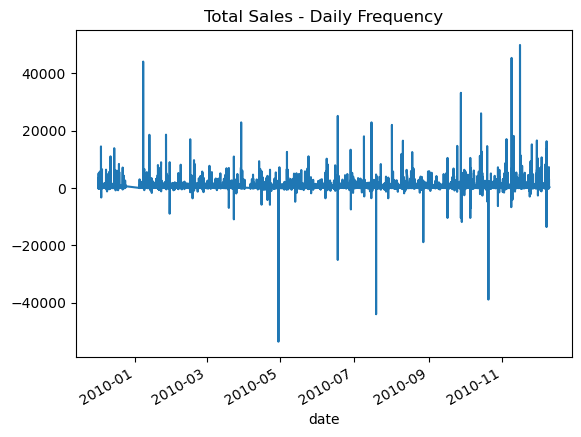

In [35]:
agg_daily_sales.plot(title = 'Total Sales - Daily Frequency')

## 2.3. Lets aggregate at the weekly level

<AxesSubplot:xlabel='date'>

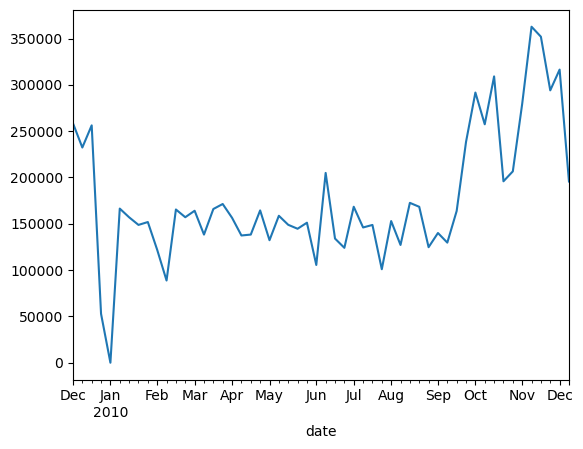

In [38]:
agg_daily_sales.resample("W").sum().plot()

## 3.1. Let's compute some statistics at the country level

In [41]:
agg_country = (
    df.groupby("country")
    ['sales']
    .agg(['std', 'sum', 'mean', 'median', 'count'])
).reset_index()


# sort by total
agg_country = agg_country.sort_values("sum", ascending=False)
agg_country.head()

,country,std,sum,mean,median,count
37,United Kingdom,162.761529,8194777.533,16.866819,8.5,485852
10,EIRE,115.264833,352242.730,36.426342,17.7,9670
24,Netherlands,140.792366,263863.410,95.291950,47.2,2769
13,Germany,35.994020,196290.351,24.146925,17.0,8129
12,France,77.613575,130769.900,22.655908,15.9,5772


In [42]:
agg_country.tail()

,country,std,sum,mean,median,count
20,Korea,19.365294,949.82,15.076508,17.700,63
39,West Indies,9.122665,536.41,9.933519,7.530,54
5,Brazil,3.759600,268.27,4.326935,2.775,62
21,Lebanon,17.488026,172.03,13.233077,15.900,13
25,Nigeria,20.033587,-6.66,-0.208125,1.950,32


<AxesSubplot:xlabel='country'>

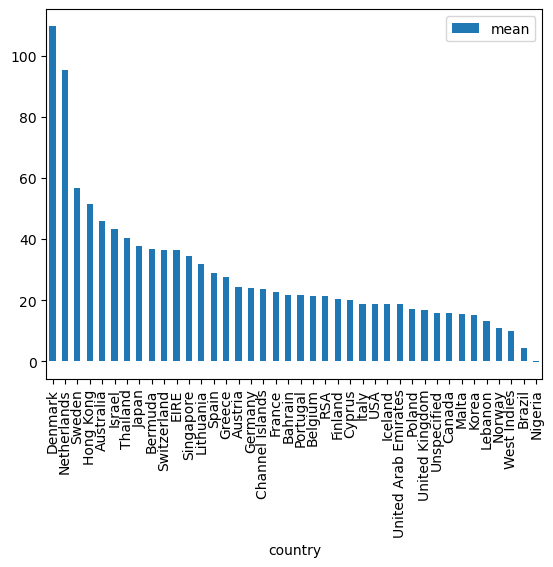

In [46]:
(agg_country
 .sort_values("mean", ascending=False)
 .plot(x='country', y='mean', kind='bar')
)

## 4.1. Item Level Analysis - MultiIndex example

In [47]:
df.head()

,invoice_id,item_id,description,quantity,date,price,customer_id,country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [48]:
df.sales.quantile([0, 0.25, 0.5, 0.75, 1])

0.00   -53594.36
0.25        3.75
0.50        9.95
0.75       17.70
1.00    25111.09
Name: sales, dtype: float64

In [49]:
agg_item = (
    df.groupby("item_id")
    [['sales', 'quantity', 'price']]
    .agg(['mean', 'median'])    
)
agg_item.head()

sales           quantity            price       
              mean median        mean median      mean median
item_id                                                      
10002    16.680306  10.20   20.651376   12.0  0.961804   0.85
10080     1.457143   0.85   14.571429    1.0  0.728571   0.85
10109     0.840000   0.84    0.000000    0.0  0.210000   0.21
10120     2.025918   0.84 -174.346939    4.0  0.250612   0.21
10125     8.774253   3.32    9.827586    3.0  1.009195   0.85

In [50]:
agg_item.columns

MultiIndex([(   'sales',   'mean'),
            (   'sales', 'median'),
            ('quantity',   'mean'),
            ('quantity', 'median'),
            (   'price',   'mean'),
            (   'price', 'median')],
           )

In [51]:
new_columns = ["_".join(cols) for cols in agg_item.columns ]
new_columns

['sales_mean',
 'sales_median',
 'quantity_mean',
 'quantity_median',
 'price_mean',
 'price_median']

In [52]:
agg_item.columns = new_columns

In [53]:
agg_item.head()

,sales_mean,sales_median,quantity_mean,quantity_median,price_mean,price_median
item_id,,,,,,
10002,16.680306,10.20,20.651376,12.0,0.961804,0.85
10080,1.457143,0.85,14.571429,1.0,0.728571,0.85
10109,0.840000,0.84,0.000000,0.0,0.210000,0.21
10120,2.025918,0.84,-174.346939,4.0,0.250612,0.21
10125,8.774253,3.32,9.827586,3.0,1.009195,0.85


## 4.2 Distribution summary - Item Level

- The 50th percentile of sales-mean is 10.7 and 4.4 for quantity mean
- This gives an idea of the what the average item sold for and the number of sales

In [54]:
# Compute quartiles for all columns
(
    agg_item
    [['sales_mean', 'quantity_mean']]
    .quantile([0.01, 0.25, 0.5, 0.75, 0.99])
)

,sales_mean,quantity_mean
0.01,0.000000,-64.250909
0.25,5.332103,1.585997
0.50,10.711064,4.400000
0.75,17.225375,9.382270
0.99,85.571713,118.450000


In [55]:
# Compute Deciles for all columns

# increments of 0.1
breaks = np.arange(0, 1.1, 0.1)

(
    agg_item
    [['sales_mean', 'quantity_mean']]
    .quantile(breaks)
)

,sales_mean,quantity_mean
0.0,-45517.340000,-5466.666667
0.1,1.250000,-1.000000
0.2,4.275300,1.201463
0.3,6.418199,2.000000
0.4,8.581955,3.138467
0.5,10.711064,4.400000
0.6,12.834038,6.000000
0.7,15.464607,7.996620
0.8,19.458343,11.000000
0.9,26.883430,17.756985


In [ ]:
df.head()